In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
dataset = pd.read_csv("C:\\Users\\Simmy\\Desktop\\MY DS FOLDER\\customers.csv")

In [5]:
dataset.head(5)


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
dataset.shape

(200, 5)

In [8]:
dataset.describe

<bound method NDFrame.describe of      CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [10]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
# missing values computation:
dataset.isnull().sum().any()

False

In [12]:
dataset.isnull().sum() # there is no missing or null values in the dataset


CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [13]:
# Feature Selection for the Model:
# Considering only 2 features (Annual Income & Spending Score) and No label available

X=dataset.iloc[:,[3,4]].values # : means all rows and only taken 3 and 4 columns(starts from 0,1,2,3,4)as column


In [18]:
# Buliding the Model
# KMeans Algorithm to decide the optimum cluster number, KMeans++ using Elbow Mmethod
# to figure out K for KMeans, I will use ELBOW Method on KMEANS++ Calculation'

from sklearn.cluster import KMeans
wcss=[] # Within -Cluster Sum of Squares

# we assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static Code to get max no clusters

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


C:\Users\Simmy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Simmy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Simmy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Simmy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Window

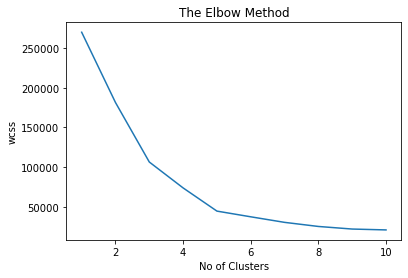

In [19]:
# Visualising the ELBOW method to get the optimal value of K, where the elbow bent is drawn there we take
# no of clusters----at below graph elbow is drawn at x axis point 5, so we take no of clusters is 5
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('No of Clusters')
plt.ylabel('wcss')
plt.show()

In [20]:
# Finally we got that k=5
# Model Build
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0) 
y_kmeans= kmeans.fit_predict(X)

C:\Users\Simmy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


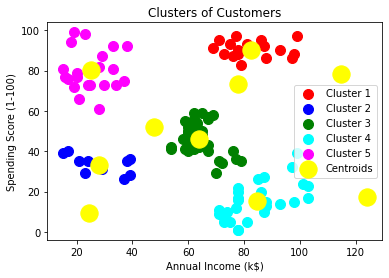

In [26]:
#Visualising all the clusters

plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3,0], X[y_kmeans == 3,1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4,0], X[y_kmeans == 4,1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow',label ='Centroids')
plt.title('Clusters of Customers') # [:,0] -> all rows first to last & column 0,[:,1] all rows & 1 column
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [ ]:
# Model Interpretation
#Cluster 1 (Red Color)-> earning high but spending less
#Cluster 2(Blue Color)->average in terms of earning and spending
#Cluster 3(Green Color)->earning high also spending high[TARGET SET]
#Cluster 4(Cyan Color)->earning less but spending more
#Cluster 1(Magenta Color)->earning less, spending less
